In [1]:
# -*- coding: utf-8 -*-

""" Auto Encoder Example.
Using an auto encoder on MNIST handwritten digits.
References:
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.
Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/
"""
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
import tflearn

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [2]:
X[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [3]:

# Building the encoder
encoder = tflearn.input_data(shape=[None, 784])
encoder = tflearn.fully_connected(encoder, 256)
encoder = tflearn.fully_connected(encoder, 64)

# Building the decoder
decoder = tflearn.fully_connected(encoder, 256)
decoder = tflearn.fully_connected(decoder, 784, activation='sigmoid')

# Regression, with mean square error
net = tflearn.regression(decoder, optimizer='adam', learning_rate=0.001,
                         loss='mean_square', metric=None)
model = tflearn.DNN(net, tensorboard_verbose=0)


In [4]:
X[0].shape

(784,)

In [5]:


# Training the auto encoder

model.fit(X, X, n_epoch=20, validation_set=(testX, testX),
          run_id="auto_encoder", batch_size=256)

# Encoding X[0] for test
print("\nTest encoding of X[0]:")
# New model, re-using the same session, for weights sharing
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))

# Testing the image reconstruction on new data (test set)
print("\nVisualizing results after being encoded and decoded:")
testX = tflearn.data_utils.shuffle(testX)[0]
# Applying encode and decode over test set
encode_decode = model.predict(testX)
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    temp = [[ii, ii, ii] for ii in list(testX[i])]
    a[0][i].imshow(np.reshape(temp, (28, 28, 3)))
    temp = [[ii, ii, ii] for ii in list(encode_decode[i])]
    a[1][i].imshow(np.reshape(temp, (28, 28, 3)))
f.show()
plt.draw()


---------------------------------
Run id: auto_encoder
Log directory: /tmp/tflearn_logs/
---------------------------------
Training samples: 55000
Validation samples: 10000
--


InternalError: Blas SGEMM launch failed : a.shape=(256, 784), b.shape=(784, 256), m=256, n=256, k=784
	 [[Node: FullyConnected/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_InputData/X_0/_11, FullyConnected/W/read)]]
	 [[Node: MeanSquare/Mean/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_49_MeanSquare/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'FullyConnected/MatMul', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-49bd98399e01>", line 4, in <module>
    encoder = tflearn.fully_connected(encoder, 256)
  File "/usr/local/lib/python3.5/dist-packages/tflearn/layers/core.py", line 173, in fully_connected
    inference = tf.matmul(inference, W)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py", line 1855, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 1454, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas SGEMM launch failed : a.shape=(256, 784), b.shape=(784, 256), m=256, n=256, k=784
	 [[Node: FullyConnected/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_InputData/X_0/_11, FullyConnected/W/read)]]
	 [[Node: MeanSquare/Mean/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_49_MeanSquare/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


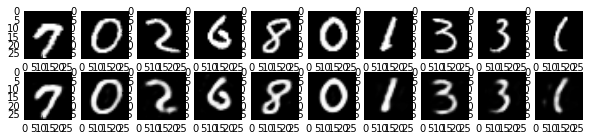

In [4]:
%matplotlib inline
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    temp = [[ii, ii, ii] for ii in list(testX[i])]
    a[0][i].imshow(np.reshape(temp, (28, 28, 3)))
    temp = [[ii, ii, ii] for ii in list(encode_decode[i])]
    a[1][i].imshow(np.reshape(temp, (28, 28, 3)))
f.show()
plt.draw()


In [5]:
print(encoding_model.predict([X[0]]))
model.save('encode_decode.tflearn')

[[4.046037197113037, 0.5489853620529175, -0.9841365218162537, -2.558471202850342, -2.068419933319092, -3.326977491378784, -1.001204490661621, -3.1855621337890625, -2.672685384750366, 6.399127960205078, 1.002844214439392, -3.3556714057922363, -6.1376261711120605, 3.7265491485595703, 0.1433783769607544, 7.06318998336792, 0.4925454556941986, 3.1403937339782715, 2.916256904602051, -0.8580623865127563, -2.0658745765686035, -0.8948999643325806, 4.692139148712158, -0.07498571276664734, 0.8052454590797424, -0.9710595011711121, -3.5420479774475098, -0.4416476786136627, 0.1523379534482956, 1.8748606443405151, 4.4508957862854, 0.4139412045478821, 3.93440842628479, -0.842342734336853, 5.345846652984619, -0.09705936908721924, -2.6893246173858643, 2.2520101070404053, -0.3132175803184509, -1.5409224033355713, 0.6368064284324646, -0.1476631760597229, -1.775817632675171, -1.6568127870559692, -2.837540864944458, -3.889625072479248, 1.891249418258667, 2.4648325443267822, -4.6508870124816895, 0.7348897457

In [6]:
model.load('encode_decode.tflearn')
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))


[[4.046037197113037, 0.5489853620529175, -0.9841365218162537, -2.558471202850342, -2.068419933319092, -3.326977491378784, -1.001204490661621, -3.1855621337890625, -2.672685384750366, 6.399127960205078, 1.002844214439392, -3.3556714057922363, -6.1376261711120605, 3.7265491485595703, 0.1433783769607544, 7.06318998336792, 0.4925454556941986, 3.1403937339782715, 2.916256904602051, -0.8580623865127563, -2.0658745765686035, -0.8948999643325806, 4.692139148712158, -0.07498571276664734, 0.8052454590797424, -0.9710595011711121, -3.5420479774475098, -0.4416476786136627, 0.1523379534482956, 1.8748606443405151, 4.4508957862854, 0.4139412045478821, 3.93440842628479, -0.842342734336853, 5.345846652984619, -0.09705936908721924, -2.6893246173858643, 2.2520101070404053, -0.3132175803184509, -1.5409224033355713, 0.6368064284324646, -0.1476631760597229, -1.775817632675171, -1.6568127870559692, -2.837540864944458, -3.889625072479248, 1.891249418258667, 2.4648325443267822, -4.6508870124816895, 0.7348897457

In [7]:
compressed = encoding_model.predict(X)
print(compressed[:1])

[[4.0460357666015625, 0.5489861369132996, -0.9841365218162537, -2.5584707260131836, -2.0684211254119873, -3.3269779682159424, -1.001204490661621, -3.1855626106262207, -2.672685146331787, 6.399129867553711, 1.0028440952301025, -3.3556716442108154, -6.137624263763428, 3.726548910140991, 0.14337803423404694, 7.063190460205078, 0.49254533648490906, 3.140392303466797, 2.9162590503692627, -0.8580620288848877, -2.0658740997314453, -0.8949006795883179, 4.692138195037842, -0.07498592138290405, 0.8052453994750977, -0.971059262752533, -3.542048215866089, -0.4416487514972687, 0.1523371785879135, 1.8748613595962524, 4.4508957862854, 0.4139419198036194, 3.9344098567962646, -0.842342734336853, 5.345847129821777, -0.09705957770347595, -2.689324378967285, 2.2520103454589844, -0.31321775913238525, -1.5409231185913086, 0.6368062496185303, -0.14766347408294678, -1.7758162021636963, -1.656813621520996, -2.837542772293091, -3.8896236419677734, 1.891249418258667, 2.464832305908203, -4.650888442993164, 0.7348

In [8]:
imgSearch = X[0]

compressedSearch = encoding_model.predict([imgSearch])

In [9]:
Y2 = np.array(compressedSearch, dtype=np.float32)
Y2

array([[ 4.0460372 ,  0.54898536, -0.98413652, -2.5584712 , -2.06841993,
        -3.32697749, -1.00120449, -3.18556213, -2.67268538,  6.39912796,
         1.00284421, -3.35567141, -6.13762617,  3.72654915,  0.14337838,
         7.06318998,  0.49254546,  3.14039373,  2.9162569 , -0.85806239,
        -2.06587458, -0.89489996,  4.69213915, -0.07498571,  0.80524546,
        -0.9710595 , -3.54204798, -0.44164768,  0.15233795,  1.87486064,
         4.45089579,  0.4139412 ,  3.93440843, -0.84234273,  5.34584665,
        -0.09705937, -2.68932462,  2.25201011, -0.31321758, -1.5409224 ,
         0.63680643, -0.14766318, -1.77581763, -1.65681279, -2.83754086,
        -3.88962507,  1.89124942,  2.46483254, -4.65088701,  0.73488975,
        -1.89464056,  0.1256941 , -1.12129831,  4.42104721, -0.44163907,
        -1.75685477, -2.80221772, -0.15730166, -0.19157477,  2.04186034,
         2.52572036, -3.05611539,  5.55074024, -2.65543604]], dtype=float32)

In [10]:
X2 = np.array(compressed, dtype=np.float32)
X2

array([[ 4.04603577,  0.54898614, -0.98413652, ..., -3.05611396,
         5.5507369 , -2.65543485],
       [ 3.11716652,  4.91006708,  2.52304029, ...,  1.39021063,
        -2.8191452 , -2.1669724 ],
       [ 1.44438457, -1.79813015,  1.75973034, ..., -2.29721355,
        -4.82513189,  1.09444833],
       ..., 
       [ 2.18934894,  0.57654136,  1.43757248, ...,  3.57240224,
        -2.23132968, -0.66687095],
       [ 3.91606021, -0.62158352, -4.46595907, ...,  2.860641  ,
         2.94244003,  0.95672804],
       [ 3.56800771,  0.7042588 ,  4.51066399, ...,  1.78600895,
         1.25458705, -1.73642302]], dtype=float32)

In [11]:
Delta = X2 - Y2
Delta

array([[ -1.43051147e-06,   7.74860382e-07,   0.00000000e+00, ...,
          1.43051147e-06,  -3.33786011e-06,   1.19209290e-06],
       [ -9.28870678e-01,   4.36108160e+00,   3.50717688e+00, ...,
          4.44632626e+00,  -8.36988544e+00,   4.88463640e-01],
       [ -2.60165262e+00,  -2.34711552e+00,   2.74386692e+00, ...,
          7.58901834e-01,  -1.03758717e+01,   3.74988437e+00],
       ..., 
       [ -1.85668826e+00,   2.75560021e-02,   2.42170906e+00, ...,
          6.62851763e+00,  -7.78207016e+00,   1.98856509e+00],
       [ -1.29976988e-01,  -1.17056894e+00,  -3.48182249e+00, ...,
          5.91675663e+00,  -2.60830021e+00,   3.61216402e+00],
       [ -4.78029490e-01,   1.55273438e-01,   5.49480057e+00, ...,
          4.84212446e+00,  -4.29615307e+00,   9.19013023e-01]], dtype=float32)

In [12]:
sqrtDistance = np.sqrt(np.square(Delta))
sqrtDistance

array([[  1.43051147e-06,   7.74860382e-07,   0.00000000e+00, ...,
          1.43051147e-06,   3.33786011e-06,   1.19209290e-06],
       [  9.28870678e-01,   4.36108160e+00,   3.50717688e+00, ...,
          4.44632626e+00,   8.36988544e+00,   4.88463640e-01],
       [  2.60165262e+00,   2.34711552e+00,   2.74386692e+00, ...,
          7.58901834e-01,   1.03758717e+01,   3.74988437e+00],
       ..., 
       [  1.85668826e+00,   2.75560021e-02,   2.42170906e+00, ...,
          6.62851763e+00,   7.78207016e+00,   1.98856509e+00],
       [  1.29976988e-01,   1.17056894e+00,   3.48182249e+00, ...,
          5.91675663e+00,   2.60830021e+00,   3.61216402e+00],
       [  4.78029490e-01,   1.55273438e-01,   5.49480057e+00, ...,
          4.84212446e+00,   4.29615307e+00,   9.19013023e-01]], dtype=float32)

In [13]:
sumDistance = sqrtDistance.sum(axis=1)
sumDistance

array([  4.15146351e-05,   1.93311890e+02,   1.92791138e+02, ...,
         1.86418472e+02,   1.79844452e+02,   1.63248260e+02], dtype=float32)

In [14]:
order = np.argsort(sumDistance)
order

array([    0, 45910, 34534, ..., 14216, 41892, 14399])

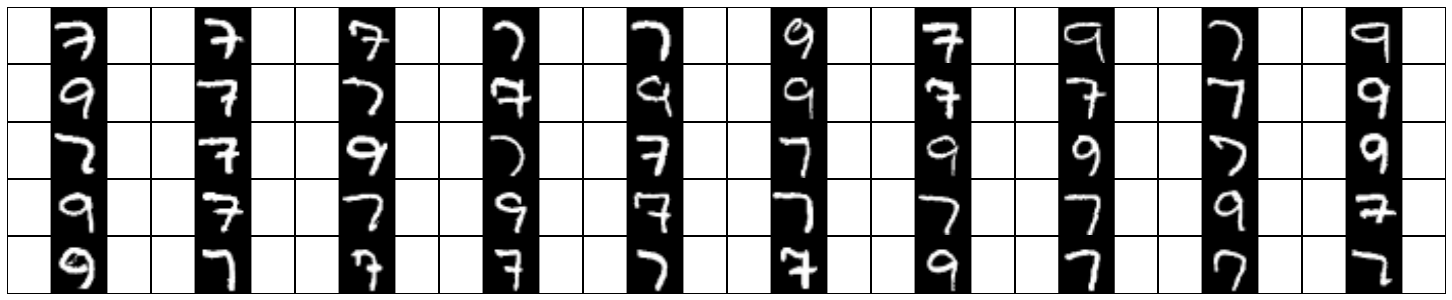

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=10, sharex=True, sharey=True, figsize=(20,4))
ind=0
for row in axes:
    for ax in row:
        img = X[order[ind]]
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind+=1

fig.tight_layout(pad=0.1)

# Check-point --- para novos testes começar direto aqui

In [1]:
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
import tflearn

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)



Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [2]:
# Building the encoder
encoder = tflearn.input_data(shape=[None, 784])
encoder = tflearn.fully_connected(encoder, 256)
encoder = tflearn.fully_connected(encoder, 64)

# Building the decoder
decoder = tflearn.fully_connected(encoder, 256)
decoder = tflearn.fully_connected(decoder, 784, activation='sigmoid')

# Regression, with mean square error
net = tflearn.regression(decoder, optimizer='adam', learning_rate=0.001,
                         loss='mean_square', metric=None)
model = tflearn.DNN(net, tensorboard_verbose=0)


model.load('encode_decode.tflearn')
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))

[[4.046037197113037, 0.5489853620529175, -0.9841365218162537, -2.558471202850342, -2.068419933319092, -3.326977491378784, -1.001204490661621, -3.1855621337890625, -2.672685384750366, 6.399127960205078, 1.002844214439392, -3.3556714057922363, -6.1376261711120605, 3.7265491485595703, 0.1433783769607544, 7.06318998336792, 0.4925454556941986, 3.1403937339782715, 2.916256904602051, -0.8580623865127563, -2.0658745765686035, -0.8948999643325806, 4.692139148712158, -0.07498571276664734, 0.8052454590797424, -0.9710595011711121, -3.5420479774475098, -0.4416476786136627, 0.1523379534482956, 1.8748606443405151, 4.4508957862854, 0.4139412045478821, 3.93440842628479, -0.842342734336853, 5.345846652984619, -0.09705936908721924, -2.6893246173858643, 2.2520101070404053, -0.3132175803184509, -1.5409224033355713, 0.6368064284324646, -0.1476631760597229, -1.775817632675171, -1.6568127870559692, -2.837540864944458, -3.889625072479248, 1.891249418258667, 2.4648325443267822, -4.6508870124816895, 0.7348897457

In [3]:

def euclidean_distance(lista, imagem):
    return distance(lista, imagem, True)

def chi_squared_distance(lista, imagem):
    return distance(lista, imagem, False)

def distance(lista, imagem, euclidean=True):
    squaredDistance = np.square(lista - imagem)
    if (euclidean==False):
        squaredDistance = squaredDistance / (np.abs(lista) + np.abs(imagem)+1)
    squareTree = np.sqrt(squaredDistance)
    distance = squareTree.sum(axis=1)
    return distance

listSearch = np.array(encoding_model.predict(X), dtype=np.float32)


def montaListaOrdenada(imagem, euclidean):
    compressedSearch = np.array(encoding_model.predict([imagem]), dtype=np.float32)
    sqrtDistance = distance(listSearch, compressedSearch, euclidean)
    order = np.argsort(sqrtDistance)
    return order

def montaListaOrdenadaSemCompressao(imagem, euclidean):
    sqrtDistance = distance(X, imagem, euclidean)
    order = np.argsort(sqrtDistance)
    return order


In [6]:
listSearch

array([[ 4.04603577,  0.54898614, -0.98413652, ..., -3.05611396,
         5.5507369 , -2.65543485],
       [ 3.11716652,  4.91006708,  2.52304029, ...,  1.39021063,
        -2.8191452 , -2.1669724 ],
       [ 1.44438457, -1.79813015,  1.75973034, ..., -2.29721355,
        -4.82513189,  1.09444833],
       ..., 
       [ 2.18934894,  0.57654136,  1.43757248, ...,  3.57240224,
        -2.23132968, -0.66687095],
       [ 3.91606021, -0.62158352, -4.46595907, ...,  2.860641  ,
         2.94244003,  0.95672804],
       [ 3.56800771,  0.7042588 ,  4.51066399, ...,  1.78600895,
         1.25458705, -1.73642302]], dtype=float32)

In [40]:

listSearchMax = np.max(listSearch)
print(listSearchMax)
listSearchMin = np.min(listSearch)
print(listSearchMin)
listSearchRange = listSearchMax - listSearchMin
print(listSearchRange)

def listaBinaria(lista):
    listSearchNorm1a5 = np.ceil(((lista - listSearchMin) / listSearchRange) * 5)
    print(listSearchNorm1a5.max())
    print(listSearchNorm1a5.min())
    print(listSearchNorm1a5.shape)
    listSearchBinaryCode = np.zeros((listSearchNorm1a5.shape[0], listSearchNorm1a5.shape[1]*4), dtype=np.bool)
    cont1 = 0
    for linha in listSearchNorm1a5:
        cont2 = 0
        for elemento in linha:
            if elemento !=0:
              listSearchBinaryCode.itemset((cont1, cont2+int(elemento)-1), True)
            cont2+=4

        cont1+=1
    return listSearchBinaryCode


14.6115
-12.7198
27.3313


In [41]:
listSearchBinaryCode = listaBinaria(listSearch)
print(listSearchBinaryCode.shape)
print(listSearchBinaryCode[0])
print(listSearchNorm1a5[0])

5.0
0.0
(55000, 64)
(55000, 256)
[False False False  True False False  True False False False  True False
 False  True False False False  True False False False  True False False
 False False  True False False  True False False False  True False False
 False False False  True False False  True False False  True False False
 False  True False False False False False  True False False  True False
 False False False  True False False  True False False False  True False
 False False  True False False False  True False False  True False False
 False False  True False False False False  True False False  True False
 False False  True False False False  True False False  True False False
 False False  True False False False  True False False False  True False
 False False False  True False False  True False False False False  True
 False False  True False False False False  True False False  True False
 False  True False False False False  True False False False  True False
 False False  True

In [45]:
def montaListaOrdenadaHamming(imagem):
    compressedSearch = np.array(encoding_model.predict([imagem]), dtype=np.float32)
    buscaBinaria = listaBinaria(compressedSearch)
    hammingDistance = listSearchBinaryCode ^ buscaBinaria
    hammingDistance = hammingDistance.sum(axis=1)
    order = np.argsort(hammingDistance)
    return order

In [46]:
X.shape

(55000, 784)

In [58]:
import time
current_milli_time = lambda: int(round(time.time() * 1000))
t0 = time.time()
print(time.asctime(time.localtime(t0)))
order = montaListaOrdenada(X[0], True)
t1 = time.time()
print(time.asctime(time.localtime(t1)))
print(int((t1-t0)*1000))
print(order[0:10])
print(order)
order2 = montaListaOrdenadaSemCompressao(X[0], True)
t2 = time.time()
print(time.asctime(time.localtime(t2)))
print(int((t2-t1)*1000))
print(order2)
print(order2[0:10])
order3 = montaListaOrdenadaHamming(X[0])
t3 = time.time()
print(time.asctime(time.localtime(t3)))
print(int((t3-t2)*1000))
print(order3)
print(order3[0:10])

Thu Jun 22 20:08:20 2017
Thu Jun 22 20:08:20 2017
42
[    0 45910 34534 19928 51900 50468  2418  1918 45794 33064]
[    0 45910 34534 ..., 14216 41892 14399]
Thu Jun 22 20:08:21 2017
479
[    0 51900 49940 ..., 49927 54452   469]
[    0 51900 49940 14893 23195 17082 39562 46704 16824 38650]
4.0
2.0
(1, 64)
Thu Jun 22 20:08:21 2017
75
[    0  6616 45910 ..., 31645 32271  1089]
[    0  6616 45910  6640 29704 33493 34534 53401 39836  6194]


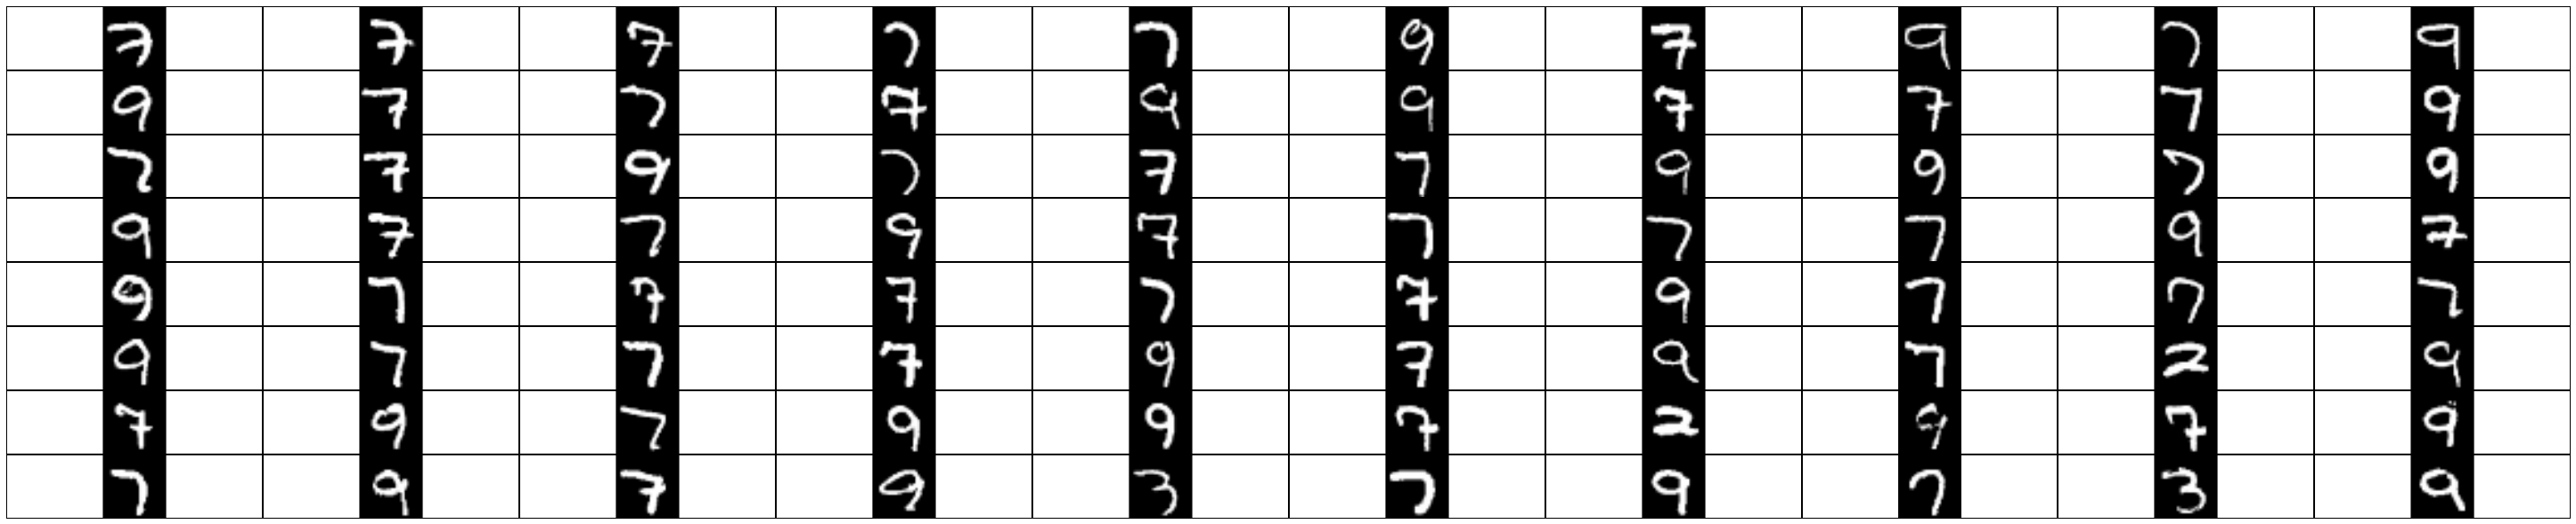

In [59]:
%matplotlib inline
fig, axes = plt.subplots(nrows=8, ncols=10, sharex=True, sharey=True, figsize=(40,8))
ind=0
for row in axes:
    for ax in row:
        img = X[order[ind]]
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind+=1

fig.tight_layout(pad=0.1)

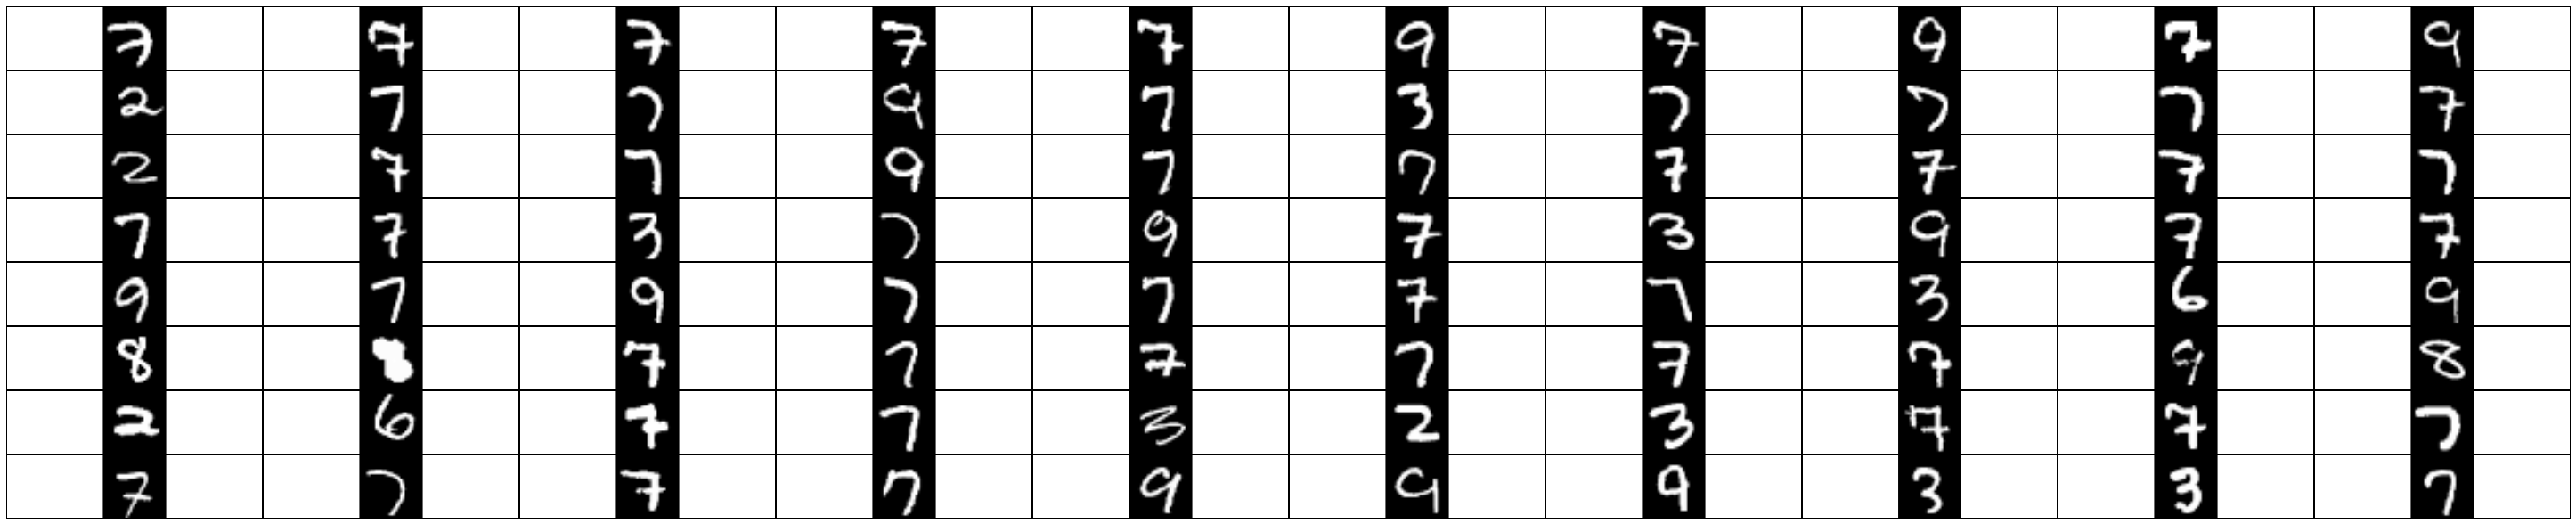

In [60]:
%matplotlib inline
fig, axes = plt.subplots(nrows=8, ncols=10, sharex=True, sharey=True, figsize=(40,8))
ind=0
for row in axes:
    for ax in row:
        img = X[order3[ind]]
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind+=1

fig.tight_layout(pad=0.1)

In [24]:
import time
t0 = time.time()
print(time.asctime(time.localtime(t0)))
order = montaListaOrdenada(X[0], True)
t1 = time.time()
print(time.asctime(time.localtime(t1)))
print(int((t1-t0)*1000))
print(order[1:10])
print(order)
order2 = montaListaOrdenadaSemCompressao(X[0], True)
t2 = time.time()
print(time.asctime(time.localtime(t1)))
print(int((t2-t1)*1000))
print(order2[1:10])
print(order2)

Wed Jun 21 21:23:16 2017
Wed Jun 21 21:23:16 2017
26
[    0 45910 34534 ..., 14216 41892 14399]
Wed Jun 21 21:23:16 2017
184
[    0 51900 49940 ..., 49927 54452   469]


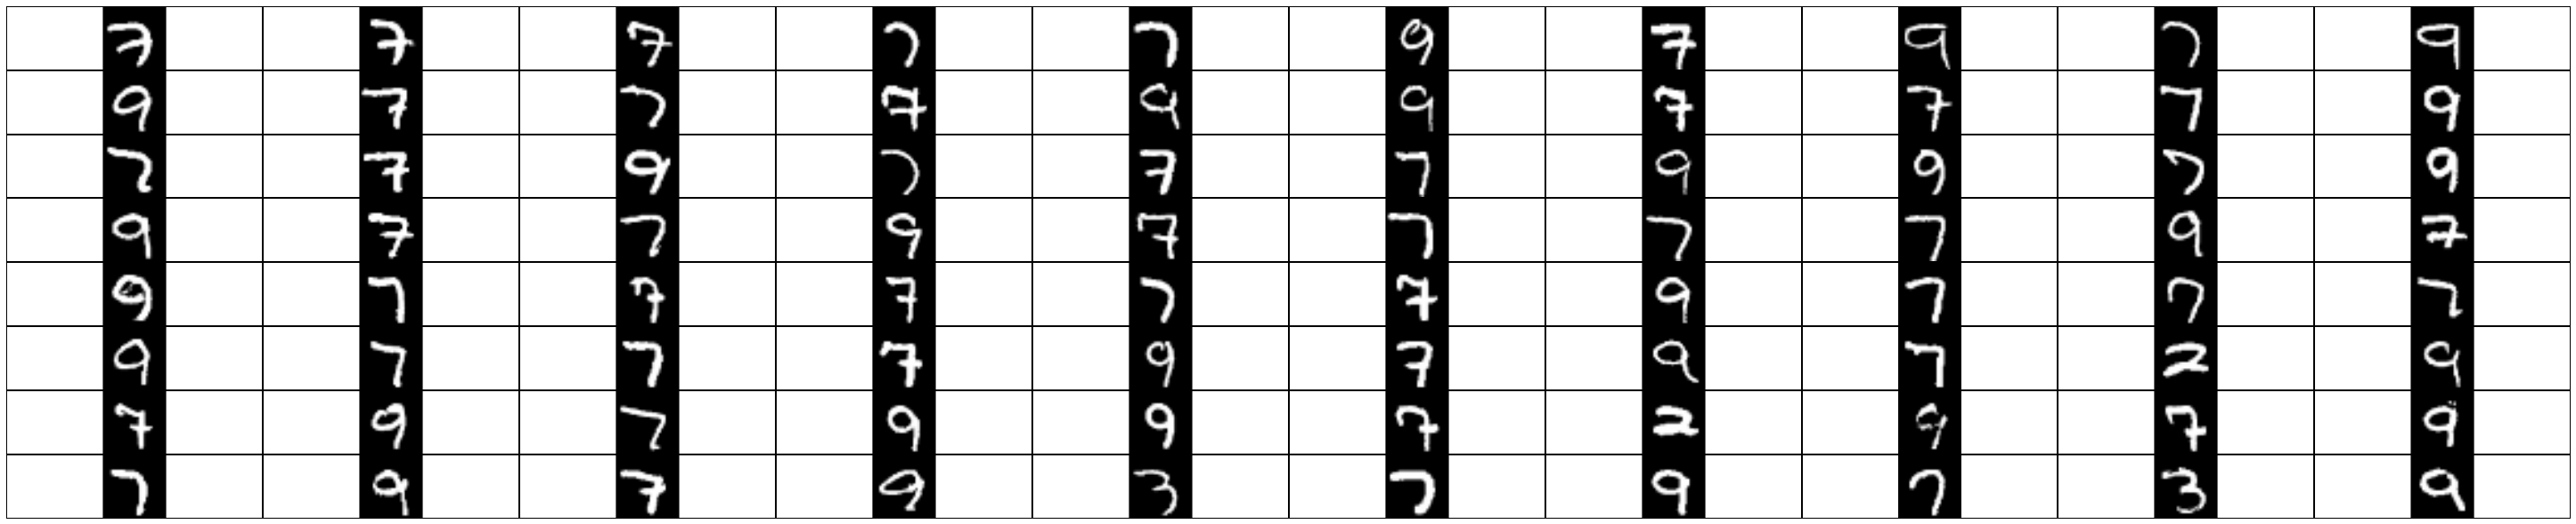

In [55]:
%matplotlib inline
fig, axes = plt.subplots(nrows=8, ncols=10, sharex=True, sharey=True, figsize=(40,8))
ind=0
for row in axes:
    for ax in row:
        img = X[order[ind]]
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind+=1

fig.tight_layout(pad=0.1)

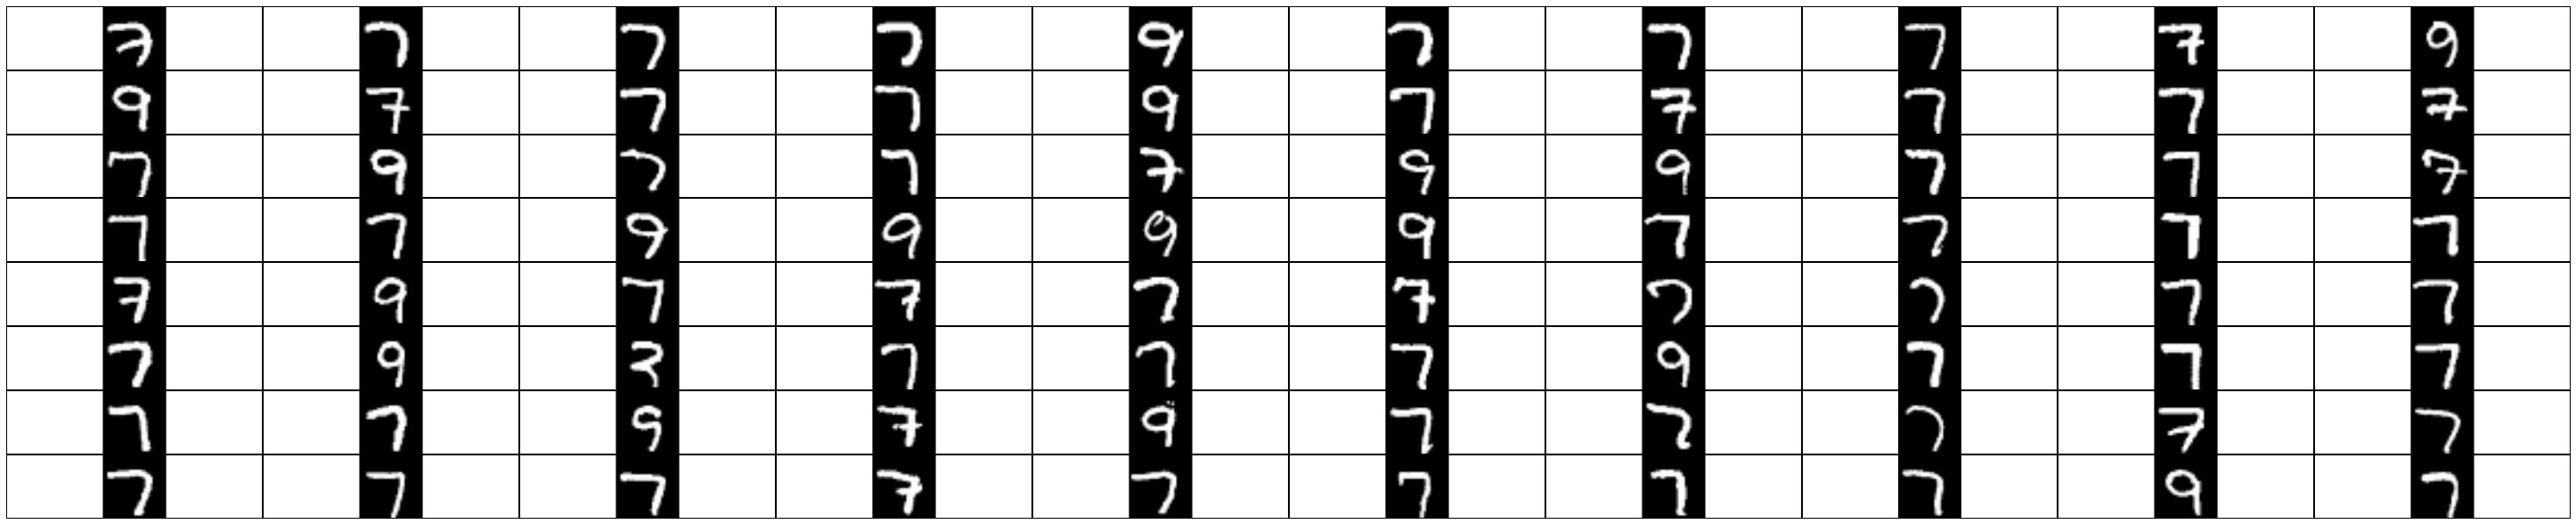

In [56]:
%matplotlib inline
fig, axes = plt.subplots(nrows=8, ncols=10, sharex=True, sharey=True, figsize=(40,8))
ind=0
for row in axes:
    for ax in row:
        img = X[order2[ind]]
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind+=1

fig.tight_layout(pad=0.1)

In [49]:
listSearch = np.array(encoding_model.predict(X), dtype=np.float32)
listSearch.shape

(55000, 64)

In [50]:
#Testar com lista 4 vezes maior
listSearch = np.tile(listSearch, (100, 1))
listSearch.shape

(5500000, 64)

In [40]:
Xold = X
X = np.tile(X, (8, 1))
X.shape

(440000, 784)

In [51]:
t0 = time.time()
print(time.asctime(time.localtime(t0)))
order = montaListaOrdenada(X[0], True)
t1 = time.time()
print(time.asctime(time.localtime(t1)))
print(int((t1-t0)*1000))
print(order)


Wed Jun 21 21:33:17 2017
Wed Jun 21 21:33:20 2017
3147
[      0 4345000 3355000 ...,  949399 3644399 4139399]


# Nada mal... 3 segundos para pesquisar em 5 milhões de imagens

, que é a carga prevista para Santos inicialmente, em um notebook relativamente comum. Em torno de 1.5GB de memória utilizados.

Se for possível comprimir as imagens de escâner, que são menores, para este tamanho ou próximo, o algoritmo parece bem viável.

Poderia ser testado também o uso de tipo de dados int8 ao invés de float, para ver se não perde muita informação.


O teste com a imagem inteira, sem a compressão do Encoder, foi inviável. O consumo de memória foi muito alto a partir de 300.000 registros, chegando a travar a interface gráfica do notebook e os tempos continuaram sendo em torno de 10 vezes maiores que a versão comprimida, mesmo a versão comprimidade tendo que fazer, antes da busca, a compressão da imagem buscada.

Em relação aos algoritmos de distância:

Euclidiana x Chi-square - Chi-square exigiu um tempo de processamento maior na busca (quase o dobro) sem ganhos aparentes.

Euclidiana x Hamming - O Hamming foi só ligeiramente mais lento. Poderia se pensar em um algoritmo Hamming codificando 9 grandezas por byte, já que o numpy não permite matriz de bits, para economizar memória e economizar processamento. Os testes com Hamming distance exigem um pré-processamento inicial maior e o Hamming terá uma perda de precisão devido ao arredondamento.

**Conclusão**

A priori, parece que o caminho mais simples é utilizar um encoder simples como esse e utilizar distância euclidiana. Entretanto, o Hamming pareceu promissor. Talvez aprender a codificar diretamente um código binário com um encoder RBM seja um caminho tecnicamente mais promissor.

Para entrega imediata, parece que vale a pena pensar em desenvolver uma aplicação simples para cadastrar todas as imagens e sua codificação e iniciar testes práticos de busca com distância euclidiana.

Próximo passo: desenvolver um "normalizador" e um Encoder para as imagens de escâner e repetir estes testes, somente para a distância euclidiana. Em caso de sucesso, fazer um script alimentador de banco de dados. Campos: contêiner, data, imagem, matriz do encoder.


In [43]:
del X
del listSearch
X = Xold


In [42]:
#Quantidade de imagens de escâner esperada na ALFSTS a pesquisar/gerenciar

3000*365*5

5475000